# Contexte du projet:

Contexte du projet
Vous ne révez plus... vous venez de faire le plein de ressources... Aujourd'hui vous allez créer votre premier labyrinthe !!
Un labyrinthe est un ensemble complexe de chemins tortueux, à embranchements multiples, dans lequel on peut tourner en rond et se perdre. Il existe un point d’entrée et aussi une issue qu’il convient d’atteindre, cette dernière pouvant être confondue avec le point d’entrée. On peut aussi placer en un certain endroit un objet qu’il s’agit d’atteindre. Dans tous les cas, on doit trouver un moyen d’explorer le labyrinthe en passant partout de façon systématique, du moins jusqu’à l’issue finale, en évitant de refaire plusieurs fois le même chemin ou de tourner en rond. Pour s’en sortir, on connaît le fil d’Ariane, les cailloux disposés sur son chemin par le Petit Poucet, ou la stratégie qui consiste à toujours longer les murs que l’on a à sa droite (ou à sa gauche si l’on préfère). Mais tout cela demande à être précisé.

Le but de ce projet est de créer un code python qui va générer aléatoirement des grilles de labyrinthe, qui va être capable de trouver la solution de celles-ci, si elle existe (eh oui, il se peut qu'un labyrinthe soit insoluble!), et qui pourra afficher tout ça sous la forme d’une image !

On a appris à parcourir un arbre, en choisissant par exemple d’aller à droite lorsque plusieurs bifurcations se présentent, et en faisant demi-tour lorsqu’on atteint une feuille de l’arbre. Pour résoudre un labyrinthe, l’approche est similaire. Pour cela considérons un objet mobile en forme de carré, caractérisé par sa position (x, y) et dirigé dans une certaine direction, celle qu’il a devant lui. A partir de cette direction, l’objet mobile peut soit garder cette direction, soit faire un quart de tour à droite, soit faire un quart de tour à gauche, soit faire demi-tour. Pour respecter les conditions de l’exploration, il va privilégier de tourner à droite, mais s’il tombe sur un mur, il choisira d’aller devant, et s’il tombe encore sur un mur, il ira à gauche. Enfin, s’il tombe sur un cul-de-sac, il fera demi-tour.

« Dans le labyrinthe, tu ne te perds pas... tu te retrouves »

## Représentation du graphe avec Python

In [1]:
G = dict()
G['a'] = ['b','c']
G['b'] = ['a','d','e']
G['c'] = ['a','d']
G['d'] = ['b','c','e']
G['e'] = ['b','d','f','g']
G['f'] = ['e','g']
G['g'] = ['e','f','h']
G['h'] = ['g']

## Programmation Python du DFS (Depth First Search) 

In [2]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import sys
from collections import defaultdict

In [3]:
def dfs(G,s) :
    couleur=dict()
    for v in G :couleur[v]='blanc'
    P=dict()# va contenir tous les sommets parcourus
    P[s]=None
    couleur[s]='gris'#colorie les sommets une fois visités
    Q=[s] # liste Q utilisée comme pile
    while Q :
        u=Q[-1]
        R=[y for y in G[u] if couleur[y]=='blanc']
        if R :
            v=R[0]
            couleur[v]='gris'
            P[v]=u
            Q.append(v)
        else :
            Q.pop()
            couleur[u]='noir'
    return P

## Application à la créaetion d'un labyrinthe 

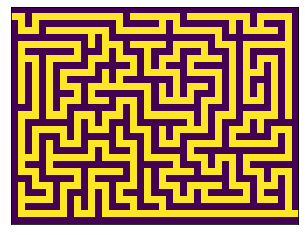

In [4]:
import random
import matplotlib.pyplot as plt


class Maillon:

    def __init__(self, valeur, suivant=None):
        self.valeur = valeur
        self.suivant = suivant



class Pile:

    def __init__(self):
        self.taille = 0 # nombre d'assiettes dans la pile
        self.sommet = None


    def empiler(self, valeur):
        self.sommet = Maillon(valeur, self.sommet)
        self.taille += 1

    def depiler(self):
        if self.taille > 0:
            valeur = self.sommet.valeur
            self.sommet = self.sommet.suivant
            self.taille -= 1
            return valeur

    def estVide(self):
        return self.taille == 0


    def lireSommet(self):
        return self.sommet.valeur



# Dimensions de la grille:
LARGEUR = 20
HAUTEUR = 15


def voisinage(couple):
    """
    Renvoie la liste des cellules voisines
    de la cellule (ligne, colonne) = couple dans la grille.
    """
    listeVoisins = []
    i, j = couple[0], couple[1]
    for d in (-1, 1):
        if -1 < i+d < HAUTEUR: listeVoisins.append( (i+d, j) )
        if   -1 < j+d < LARGEUR: listeVoisins.append( (i, j+d) )
    return listeVoisins

def dfs(s) :
    P = {s: None}
    Q = Pile()
    Q.empiler(s)
    while not(Q.estVide()) :
        u = Q.lireSommet()
        R=[y for y in voisinage(u) if y not in P]
        if R :
            v=random.choice(R)
            P[v]=u
            Q.empiler(v)
        else :
            Q.depiler()
    return P



def dedale():
    """
    Fonction dessinant le résultat
    """
    labyrinthe = [ [0 for j in range(2*LARGEUR+1)] for i in range(2*HAUTEUR+1)]
    parcours = dfs((0,0))

    for i,j in parcours:
        labyrinthe[2*i+1][2*j+1] = 1
        if (i,j) !=  (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 1
            labyrinthe[i+k+1][j+l+1] = 1

    labyrinthe[1][0] = 1
    labyrinthe[2*HAUTEUR-1][2*LARGEUR] = 1

    # le graphique:
    plt.imshow(labyrinthe)
    # on cache les graduations:
    plt.xticks([])
    plt.yticks([])
    # on visualise le résultat:
    plt.show()



dedale()

In [5]:
def voisinage(couple):
    """
    Renvoie la liste des cellules voisines
    de la cellule (ligne, colonne) = couple dans la grille.
    """
    listeVoisins = []
    
    i, j = couple[0], couple[1]
    for d in (-1, 1):
        if -1 < i+d < HAUTEUR: listeVoisins.append( (i+d, j) )
        if -1 < j+d < LARGEUR: listeVoisins.append( (i, j+d) )
        
    return listeVoisins

In [6]:
# Trouver un chemin dans le labyrinthe
def find_path(graph, start, end, path=[]): 
    path = path + [start] 
    if start == end: 
        return path 
    for node in graph[start]: 
        if node not in path: 
            newpath = find_path(graph, node, end, path) 
            if newpath: 
                return newpath

In [7]:
# Imprimer le labyrinthe
def printLay (labyrinthe):
    plt.imshow(labyrinthe)
     # on cache les graduations:
    plt.xticks([])
    plt.yticks([])
     # on visualise le résultat:
    plt.show()
     #print(labyrinthe)

# une fonction qui permet de convertir le parcous récupéré par dfs

def convDic (d):
    dic_new = {}
    for i in d.keys():
        dic_new[i] = [d[i]]
        if d[i] in dic_new.keys():
            dic_new[d.get(i)].append(i)
    for i in d.keys():
        dic_new[i] = {node : 1 for node in dic_new[i] if node != None }
    return dic_new

# une fonction qui permet de colorier le chemin
def ColerPath (parcours, path): 
    labyrinthe = [ [0 for j in range(2*LARGEUR+1)] for i in range(2*HAUTEUR+1)] 
    
    #print(parcours)
    for i,j in parcours:
        labyrinthe[2*i+1][2*j+1] = 3
        if (i,j) !=  (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 3
            labyrinthe[i+k+1][j+l+1] = 3
            
    for (i,j) in path:
        labyrinthe[2*i+1][2*j+1] = 5
        #if (i,j) in path: 
        if (i,j) !=  (0,0):
            k,l = parcours[(i,j)]
            labyrinthe[2*k+1][2*l+1] = 5
            labyrinthe[i+k+1][j+l+1] = 5
    labyrinthe[1][0] = 2
    labyrinthe[2*HAUTEUR-1][2*LARGEUR] = 5
    return labyrinthe

In [8]:
#Visualisation du graphe avec networkx
def visNx (dic):
    g = nx.Graph()
    for i, j in dic.items():
        for k in j:
            g.add_edge( i,k )
    f, ax = plt.subplots(figsize=(10,5))
    nx.draw(g, ax = ax, with_labels=True, font_weight='bold')


Visualisation labyrinthe  Hauteur: 12 Largeur: 8


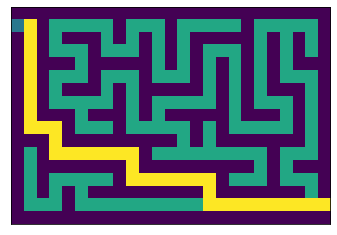

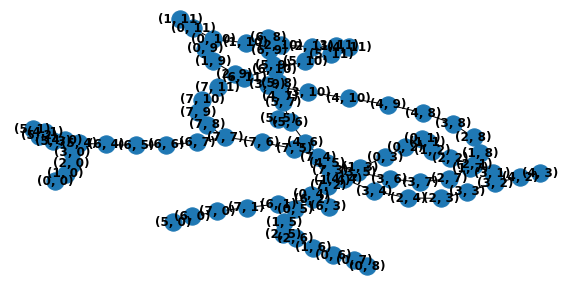

In [9]:
# Dimensions de la grille:
LARGEUR = 12
HAUTEUR = 8

print(f"Visualisation labyrinthe  Hauteur: {LARGEUR} Largeur: {HAUTEUR}")
dic = {(0,0) : None}

parcours = dfs((0,0))

dic = convDic (parcours)

path=find_path(dic, (0, 0), (HAUTEUR-1,LARGEUR-1))

labyrinthe = ColerPath (parcours, path)

printLay (labyrinthe)

visNx (dic)